In [218]:
import numpy as np
import pandas as pd

import ast
import os

In [167]:
def parse_results(file_name):
    grid_search_results = []
    with open(file_name, 'r') as file:
        for line in file.readlines():
            if line[0:4] == '----':
                grid_search_results.append([])
                continue

            if line[0] == '(':
                fixed_line = '[' + line.strip().replace(') (', '), (') + ']'
                params = ast.literal_eval(fixed_line)
                nested = [list(zip(key.split(','), np.array(val).flatten())) for (key, val) in params]
                unnested = [item for sublist in nested for item in sublist]
                grid_search_results[-1].append({key: val for (key, val) in unnested})
                grid_search_results[-1].append([])
                continue

            result = line

            if result[0] == '[':
                grid_search_results[-1][-1].append(ast.literal_eval(result))
                continue

    grid_search_results = [(params, np.array(values)) for params, values in grid_search_results]
    return grid_search_results

In [168]:
DIR_PATH = '../strawberry/grid_search_results'
res_files = [os.path.join(DIR_PATH, f) for f in [f for f in os.listdir(DIR_PATH) if os.path.isfile(os.path.join(DIR_PATH, f))] if f[0:7] != 'subsets']

In [169]:
print(res_files)

['../strawberry/grid_search_results/both_deep_100.txt', '../strawberry/grid_search_results/both_wide_200.txt', '../strawberry/grid_search_results/both_final_100.txt', '../strawberry/grid_search_results/both_init_small_50.txt', '../strawberry/grid_search_results/both_init_50.txt', '../strawberry/grid_search_results/both_init_100.txt', '../strawberry/grid_search_results/both_wide_60.txt']


In [170]:
all_res = [parse_results(f) for f in res_files]
all_res = [item for row in all_res for item in row]

In [171]:
all_params = [p for p, _ in all_res]
all_values = [np.array(v) for _, v in all_res]

In [172]:
hyp_indices = [i for i, p in enumerate(all_params) if p['model_type'] == 'hyp']
euc_indices = [i for i, p in enumerate(all_params) if p['model_type'] == 'euc']

In [173]:
hyp_params = []
hyp_values = []

euc_params = []
euc_values = []

In [174]:
for i, (p, v) in enumerate(zip(all_params, all_values)):
    if i in hyp_indices:
        hyp_params.append(p)
        hyp_values.append(v)
    else:
        euc_params.append(p)
        euc_values.append(v)

In [175]:
hyp_size_values = {size: [] for size in set([p['layer_size'] for p in hyp_params])}
euc_size_values = {size: [] for size in set([p['layer_size'] for p in euc_params])}

for i, (p, v) in enumerate(zip(hyp_params, hyp_values)):
    hyp_size_values[p['layer_size']].append((i, v.mean(axis=0)))
for i, (p, v) in enumerate(zip(euc_params, euc_values)):
    euc_size_values[p['layer_size']].append((i, v.mean(axis=0)))

In [176]:
hyp_num_indices = {num: [] for num in set([p['num_hidden_layers'] for p in hyp_params])}
euc_num_indices = {num: [] for num in set([p['num_hidden_layers'] for p in euc_params])}

for i, (p, v) in enumerate(zip(hyp_params, hyp_values)):
    hyp_num_indices[p['num_hidden_layers']].append(i)
for i, (p, v) in enumerate(zip(euc_params, euc_values)):
    euc_num_indices[p['num_hidden_layers']].append(i)

In [177]:
NUMS = [1,2,4,8,16]
SIZES = [2,4,8,16,32,64,128,256]

In [178]:
print('\\textbf{Embedding Size}  & \\multicolumn{5}{c}{\\textbf{\\# Hidden Layers}}  \\\\ \\hline')
print('\\textbf{-} &', ' & '.join([f'\\textbf{"{"+str(num)+"}"}' for num in NUMS]), ' \\\\ \\hline')
for size in SIZES:
    print(f'\\textbf{"{"+str(size)+"}"}', end='')
    for num_hidden_layers in NUMS:
        # print(f'{size}: {min([v.min() for v in hyp_size_values[size]]):.3}, {min([v[-1] for v in hyp_size_values[size]]):.3}')
        # print(f'{size}: {min([v[-1] for v in hyp_size_values[size]]):.2}')
        # print(f'{size}: {min([min(v[0], min(v[49::50])) for i, v in hyp_size_values[size] if i in hyp_num_indices[num_hidden_layers]]):.2}')
        print(f' & {min([1.0, *[min(v[0], min(v[49::50])) for i, v in hyp_size_values[size] if i in hyp_num_indices[num_hidden_layers]]]):.3f}', end=' ')
    print('\\\\')

\textbf{Embedding Size}  & \multicolumn{5}{c}{\textbf{\# Hidden Layers}}  \\ \hline
\textbf{-} & \textbf{1} & \textbf{2} & \textbf{4} & \textbf{8} & \textbf{16}  \\ \hline
\textbf{2} & 0.121  & 0.104  & 0.096  & 0.066  & 0.050 \\
\textbf{4} & 0.116  & 0.092  & 0.075  & 0.065  & 0.048 \\
\textbf{8} & 0.144  & 0.095  & 0.075  & 0.056  & 0.047 \\
\textbf{16} & 0.065  & 0.041  & 0.045  & 0.041  & 0.044 \\
\textbf{32} & 0.043  & 0.044  & 0.042  & 0.039  & 0.039 \\
\textbf{64} & 0.046  & 0.034  & 0.036  & 0.033  & 0.031 \\
\textbf{128} & 0.047  & 0.048  & 0.040  & 0.043  & 0.043 \\
\textbf{256} & 0.054  & 0.057  & 0.045  & 0.047  & 0.048 \\


In [179]:
print('\\textbf{Embedding Size}  & \\multicolumn{5}{c}{\\textbf{\\# Hidden Layers}}  \\\\ \\hline')
print('\\textbf{-} &', ' & '.join([f'\\textbf{"{"+str(num)+"}"}' for num in NUMS]), ' \\\\ \\hline')
for size in SIZES:
    print(f'\\textbf{"{"+str(size)+"}"}', end='')
    for num_hidden_layers in NUMS:
        print(f' & {min([1.0, *[min(v[0], min(v[49::50])) for i, v in euc_size_values[size] if i in euc_num_indices[num_hidden_layers]]]):.3f}', end=' ')
    print('\\\\')

\textbf{Embedding Size}  & \multicolumn{5}{c}{\textbf{\# Hidden Layers}}  \\ \hline
\textbf{-} & \textbf{1} & \textbf{2} & \textbf{4} & \textbf{8} & \textbf{16}  \\ \hline
\textbf{2} & 0.046  & 0.038  & 0.039  & 0.156  & 0.047 \\
\textbf{4} & 0.042  & 0.038  & 0.047  & 0.047  & 0.047 \\
\textbf{8} & 0.040  & 0.039  & 0.036  & 0.047  & 0.047 \\
\textbf{16} & 0.037  & 0.036  & 0.046  & 0.046  & 0.047 \\
\textbf{32} & 0.039  & 0.036  & 0.035  & 0.047  & 0.047 \\
\textbf{64} & 0.039  & 0.036  & 0.034  & 0.047  & 0.046 \\
\textbf{128} & 0.039  & 0.037  & 0.035  & 0.046  & 0.046 \\
\textbf{256} & 0.104  & 0.041  & 0.036  & 0.046  & 0.047 \\


In [15]:
# [(i, [v.mean(axis=0)[0], *v.mean(axis=0)[49::50]]) for i, v in enumerate(hyp_values)]
[(i, v.mean(axis=0)) for i, v in enumerate(hyp_values)]

[(0,
  array([0.61252855, 0.36514554, 0.16026333, 0.17057315, 0.23422714,
         0.26036439, 0.24781374, 0.21292102, 0.16959285, 0.13101625,
         0.10737123, 0.09465594, 0.08836947, 0.08375714, 0.07860323,
         0.0727311 , 0.06705256, 0.06163551, 0.05766595, 0.05508973,
         0.05305634, 0.05161343, 0.0508868 , 0.0532942 , 0.0563193 ,
         0.05872158, 0.06040115, 0.06141269, 0.06144105, 0.06058   ,
         0.05904402, 0.05700416, 0.0545166 , 0.05163211, 0.04877203,
         0.04700182, 0.04574053, 0.04523969, 0.04521677, 0.04547105,
         0.04563281, 0.04574959, 0.04575107, 0.04569324, 0.04554252,
         0.04533425, 0.04507864, 0.04479833, 0.04452392, 0.04427906,
         0.04423034, 0.04423728, 0.04434978, 0.04443781, 0.04446871,
         0.04446462, 0.04439545, 0.04426778, 0.04408938, 0.04390522,
         0.04373577, 0.0436465 , 0.04365865, 0.04369356, 0.04372432,
         0.04374849, 0.0437746 , 0.04381555, 0.04386442, 0.04389748,
         0.04391957, 0.043934

In [219]:
NUMS = [1,2,4,8,16]
SIZES = [2,4,8,16,32,64,128,256]
STRAWBERRY_IN = 89
TOMATO_IN = 70
BLUEBERRY_IN = 56

euc_strawberry = np.array([[0.046,0.038,0.039,0.046,0.047],
[0.042,0.038,0.047,0.047,0.047],
[0.040,0.039,0.036,0.047,0.047],
[0.037,0.036,0.046,0.046,0.047],
[0.039,0.036,0.035,0.047,0.047],
[0.039,0.036,0.034,0.047,0.046],
[0.039,0.037,0.035,0.046,0.046],
[0.041,0.041,0.036,0.046,0.047],])

hyp_strawberry = np.array([[0.121,0.104,0.096,0.066,0.050],
[0.116,0.092,0.075,0.065,0.048],
[0.144,0.095,0.075,0.056,0.047],
[0.065,0.041,0.045,0.041,0.044],
[0.043,0.044,0.042,0.039,0.039],
[0.046,0.034,0.036,0.033,0.031],
[0.047,0.048,0.040,0.043,0.043],
[0.054,0.057,0.045,0.047,0.048],])

euc_tomato = np.array([[0.044,0.051,0.045,0.051,0.051],
[0.044,0.046,0.050,0.051,0.051],
[0.045,0.044,0.048,0.050,0.051],
[0.045,0.044,0.045,0.051,0.051],
[0.045,0.044,0.050,0.051,0.051],
[0.044,0.044,0.045,0.050,0.051],
[0.043,0.043,0.044,0.051,0.050],
[0.053,0.043,0.042,0.051,0.051],])

hyp_tomato = np.array([[0.054,0.053,0.050,0.051,0.051],
[0.048,0.048,0.046,0.048,0.049],
[0.052,0.048,0.046,0.042,0.047],
[0.055,0.049,0.046,0.044,0.045],
[0.057,0.056,0.049,0.043,0.043],
[0.052,0.050,0.041,0.042,0.043],
[0.061,0.052,0.044,0.047,0.046],
[0.056,0.055,0.043,0.044,0.044],])

# euc_blueberry = np.array([[0.029,0.037,0.037,0.037,0.038],
# [0.029,0.033,0.037,0.037,0.038],
# [0.029,0.037,0.036,0.037,0.038],
# [0.029,0.031,0.037,0.037,0.037],
# [0.029,0.031,0.037,0.037,0.037],
# [0.029,0.036,0.037,0.037,0.037],
# [0.029,0.034,0.037,0.037,1.000],
# [0.029,0.031,0.035,0.038,1.000],])

# hyp_blueberry = np.array([[0.033,0.033,0.033,0.037,0.038],
# [0.032,0.031,0.030,0.036,0.038],
# [0.032,0.030,0.031,0.034,0.036],
# [0.033,0.031,0.029,0.033,0.037],
# [0.034,0.032,0.031,0.033,0.034],
# [0.032,0.030,0.031,0.037,0.040],
# [0.038,0.038,0.038,0.038,1.000],
# [0.038,0.038,0.038,0.038,1.000],])

In [311]:
# hyp, euc = hyp_strawberry, euc_strawberry
hyp, euc = hyp_tomato, euc_tomato

In [312]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap

In [313]:
proj_5_8_diag = np.diag([5, 9.5, 4, 6.5])

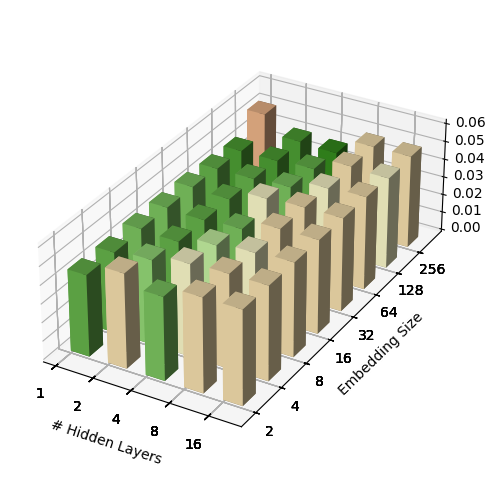

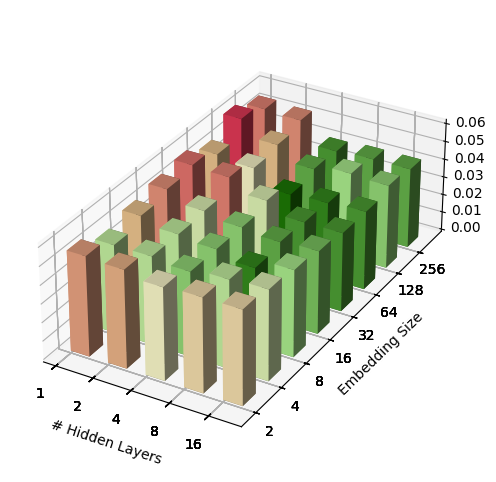

In [314]:
# norm = plt.Normalize(np.log(min(euc_strawberry.min(), hyp_strawberry.min())), np.log(max(euc_strawberry.max(), hyp_strawberry.max())))
comb_min, comb_max = min(hyp.min(), euc.min()), max(hyp.max(), euc.max())
norm = plt.Normalize(np.log(comb_min), np.log(comb_max))

cmap = cm.RdYlGn.reversed()
# colors = [(0, '#E33A57'), (0.4, ('#F0C791')), (0.5, ('#FFFBCD')), (0.65, ('#AFF091')), (1, '#228509')]
colors = [(0, '#E33A57'), (0.4, ('#F0C791')), (0.5, ('#FFFBCD')), (0.65, ('#AFF091')), (1, '#1D7906')]
cmap = LinearSegmentedColormap.from_list('Diff', colors).reversed()

for model, data in zip(['euc', 'hyp'], [euc, hyp]):
    x = np.arange(5)
    y = np.arange(8)
    x, y = np.meshgrid(x, y)
    x_ticks, y_ticks = np.meshgrid(NUMS, SIZES)
    x_ticks = x_ticks.flatten()
    y_ticks = y_ticks.flatten()
    x = x.flatten()
    y = y.flatten()
    z = np.zeros_like(x)
    dx = dy = 0.5
    dx = dy = 0.5
    dz = data.flatten()

    colors = cmap(norm(np.log(dz)))

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.bar3d(x, y, z, dx, dy, dz, color=colors, shade=True)

    ax.set_zlim(0,comb_max)

    ax.set_xlabel('# Hidden Layers')
    ax.set_ylabel('\nEmbedding Size')
    ax.set_zlabel('\nMAE  ')

    # Set logarithmic scale labels
    ax.set_xticks(x)
    ax.set_xticklabels(x_ticks)
    ax.set_yticks(y)
    ax.set_yticklabels(y_ticks)

    ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), proj_5_8_diag)
    # plt.savefig(f'strawberry_{model}.pdf', format='pdf', bbox_inches='tight')
    plt.show()


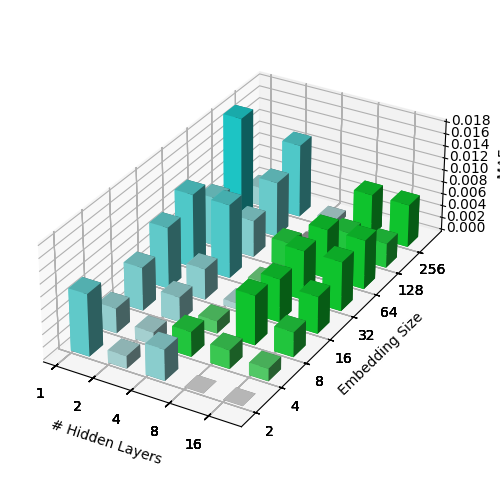

In [315]:
# colors = [(0, '#11DDDD'), (0.5, ('#EEEEEE')), (0.9, ('#88EEAA')), (1, '#11DD33')] # for tomato
colors = [(0, '#11DDDD'), (0.5, ('#EEEEEE')), (1, '#11DD33')] #for strawberry
cmap = LinearSegmentedColormap.from_list('Diff', colors).reversed()
# cmap = cm.cool.reversed()

data = hyp - euc

x = np.arange(5)
y = np.arange(8)
x, y = np.meshgrid(x, y)
x_ticks, y_ticks = np.meshgrid(NUMS, SIZES)
x_ticks = x_ticks.flatten()
y_ticks = y_ticks.flatten()
x = x.flatten()
y = y.flatten()
z = np.zeros_like(x)
dx = dy = 0.5
dx = dy = 0.5
dz = data.flatten()

# norm = plt.Normalize(data.min(), data.max())
norm = TwoSlopeNorm(vmin=dz.min(), vcenter=0, vmax=dz.max()*1.3)
scaled_sign = np.sign(dz)
scaled_sign[scaled_sign == -1] = dz.min()*0.4
scaled_sign[scaled_sign == 1] = dz.max()*0.2
colors = cmap(norm(scaled_sign + dz))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x, y, z, dx, dy, abs(dz), color=colors, shade=True)

# ax.set_zlim(0,0.1)

ax.set_xlabel('# Hidden Layers')
ax.set_ylabel('\nEmbedding Size')
ax.set_zlabel('\nMAE  ')

# Set logarithmic scale labels
ax.set_xticks(x)
ax.set_xticklabels(x_ticks)
ax.set_yticks(y)
ax.set_yticklabels(y_ticks)

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), proj_5_8_diag)

# plt.savefig(f'strawberry_diff.pdf', format='pdf', bbox_inches='tight')
plt.show()


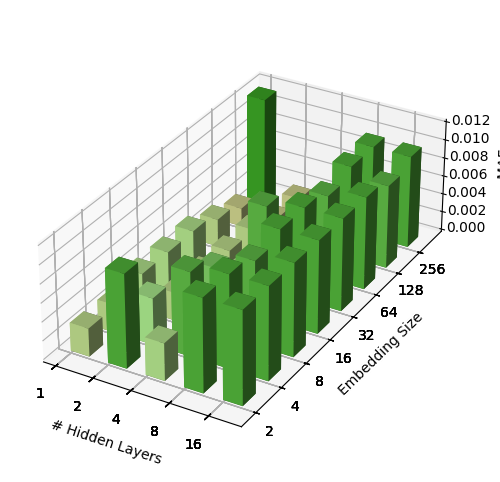

In [316]:
# colors = [(0, '#11DDDD'), (0.5, ('#EEEEEE')), (0.9, ('#88EEAA')), (1, '#11DD33')] # for tomato
colors = [(0, '#11DDDD'), (0.5, ('#EEEEEE')), (1, '#11DD33')] #for strawberry
colors = [(0, ('#F0C791')), (0.65, ('#AFF091')), (1, '#3DA926')]
cmap = LinearSegmentedColormap.from_list('Diff', colors)
# cmap = cm.cool.reversed()

data = euc - hyp.min()

x = np.arange(5)
y = np.arange(8)
x, y = np.meshgrid(x, y)
x_ticks, y_ticks = np.meshgrid(NUMS, SIZES)
x_ticks = x_ticks.flatten()
y_ticks = y_ticks.flatten()
x = x.flatten()
y = y.flatten()
z = np.zeros_like(x)
dx = dy = 0.5
dx = dy = 0.5
dz = data.flatten()

norm = plt.Normalize(np.log(data.min()), np.log(data.max()))
colors = cmap(norm(np.log(dz)))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(x, y, z, dx, dy, abs(dz), color=colors, shade=True)

# ax.set_zlim(0,0.1)

ax.set_xlabel('# Hidden Layers')
ax.set_ylabel('\nEmbedding Size')
ax.set_zlabel('\nMAE  ')

# Set logarithmic scale labels
ax.set_xticks(x)
ax.set_xticklabels(x_ticks)
ax.set_yticks(y)
ax.set_yticklabels(y_ticks)

ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), proj_5_8_diag)

plt.savefig(f'tomato_best_diff.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [294]:
data

array([[-0.015, -0.007, -0.008, -0.015, -0.016],
       [-0.011, -0.007, -0.016, -0.016, -0.016],
       [-0.009, -0.008, -0.005, -0.016, -0.016],
       [-0.006, -0.005, -0.015, -0.015, -0.016],
       [-0.008, -0.005, -0.004, -0.016, -0.016],
       [-0.008, -0.005, -0.003, -0.016, -0.015],
       [-0.008, -0.006, -0.004, -0.015, -0.015],
       [-0.01 , -0.01 , -0.005, -0.015, -0.016]])